In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
#from src.utils.logger_functions import console
from src.cmos_plotter.Plotter_Helper_KV import *
from src.utils.metadata_functions import load_metadata_as_dataframe

In [2]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [4]:
MAIN_PATH = f'/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Small_Network_Plasticity/3_Processed_Data/BCM_Test'
metadata = load_metadata_as_dataframe(file_path = os.path.join(MAIN_PATH, ''))

2025-03-21 19:44:02,709 Metadata successfully loaded. 
 First 5 rows: 
                                             Filename  DIV  Chip_ID  Network_ID
0  ID1821_3_DIV45_DATE20240405_1455_spontaneous_b...   45     1821           3
1  ID1821_2_DIV45_DATE20240405_1054_spontaneous_b...   45     1821           2
2  ID1821_1_DIV45_DATE20240405_0849_spontaneous_a...   45     1821           1
3  ID1821_3_DIV45_DATE20240405_1508_spontaneous_a...   45     1821           3
4  ID1821_2_DIV45_DATE20240405_1206_spontaneous_a...   45     1821           2


In [5]:
import seaborn as sns
data_path = MAIN_PATH + '/Latency_plots/Latency_plots_with_extremum/after_inhibition/with_extremum/'    
filenames = os.listdir(data_path)
filenames = [filename for filename in filenames if filename.endswith('.pkl')]
#filenames = [filename for filename in filenames if 'before' in filename]


all_probabilities = []
for filename in filenames:
    data = pd.read_pickle(data_path + filename)
    print(data)
    data_output = data[data['category'] == 'output']
    median_latency = np.median(data_output['latency'])
    data_filt = data_output[(data_output['latency'] >= median_latency - 1) & (data_output['latency'] <= median_latency + 1)]
    input_spike_counts = np.sum(data['category'] == 'input')
    output_spike_counts = np.sum(np.isin(data_filt['input spike'], data['input spike'][data['category'] == 'input']))
    probability = output_spike_counts / input_spike_counts
    all_probabilities.append(probability)

all_probabilities_filt = [prob for prob in all_probabilities if prob > 0.1]
all_probabilities_filt = [prob for prob in all_probabilities_filt if prob < 0.9]
sns.histplot(all_probabilities_filt, bins=10, kde=True)
plt.xlabel('Probability')
plt.xlim(0,1)
plt.ylim(0,14)
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Small_Network_Plasticity/3_Processed_Data/BCM_Test/Latency_plots/Latency_plots_with_extremum/after_inhibition/with_extremum/'

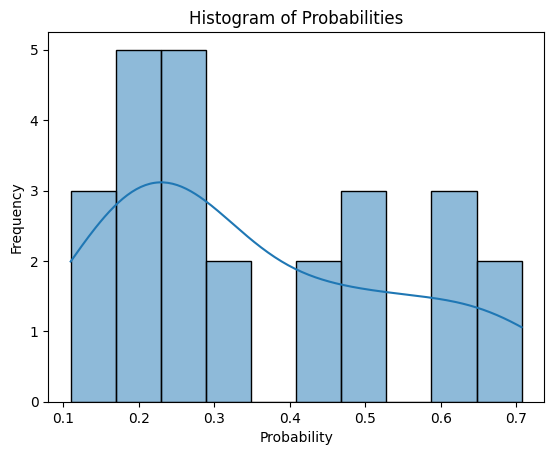

In [13]:
import seaborn as sns
data_path = MAIN_PATH + '3_Processed_Data/BCM_Test/Latency_plots_TE/'
filenames = os.listdir(data_path)
filenames = [filename for filename in filenames if filename.endswith('.pkl')]
filenames = [filename for filename in filenames if 'after' in filename]


all_probabilities = []
for filename in filenames:
    data = pd.read_pickle(data_path + filename)
    data_output = data[data['category'] == 'output']
    median_latency = np.median(data_output['latency'])
    data_filt = data_output[(data_output['latency'] >= median_latency - 1) & (data_output['latency'] <= median_latency + 1)]

    input_spike_counts = np.sum(data['category'] == 'input')
    output_spike_counts = np.sum(np.isin(data_filt['input spike'], data['input spike'][data['category'] == 'input']))
    probability = output_spike_counts / input_spike_counts
    all_probabilities.append(probability)

all_probabilities_filt = [prob for prob in all_probabilities if prob > 0.1]
all_probabilities_filt = [prob for prob in all_probabilities_filt if prob < 0.9]
sns.histplot(all_probabilities_filt, bins=10, kde=True)
plt.xlabel('Probability')
plt.xlim()
plt.ylabel('Frequency')
plt.title('Histogram of Probabilities')
plt.show()

In [8]:
example = 'ID1851_N0_DIV100_DATE20240530_1407_spontaneous_.raw_input_el_18089_output_el_2467_lag_2.pkl'
#take string of the example unitl it says raw
example = example.split('raw')[0]
example = example + 'raw'
example

'ID1851_N0_DIV100_DATE20240530_1407_spontaneous_.raw'

In [4]:
import seaborn as sns
data_path = MAIN_PATH + 'Latency_plots/Latency_plots_with_extremum/before_inhibition/'
pickle_files = os.listdir(data_path)
pickle_files = [file for file in pickle_files if file.endswith('.pkl')]
unique_pairs = set()
for pickle_file in pickle_files:
    parts = pickle_file.split('_')
    chip_id = parts[0]
    area = parts[1]
    input_el = int(parts[parts.index('input') + 2])
    output_el = int(parts[parts.index('output') + 2])
    unique_pairs.add((chip_id, area, input_el, output_el))

unique_pairs = list(unique_pairs)
#unique_pairs

In [2]:
def plot_latency_and_location(save_path, spikes, input_ids, output_ids):
    include_input_in_latency = True

    for idx, input_id in enumerate(input_ids):
        if include_input_in_latency:
            output_ids = list(set(output_ids + [id for id in input_ids if id != input_id]))

        input_electrode = np.array([input_id], dtype=float)
        input_color = 'blue'
        input_spikes = spikes[spikes[:, 0] == input_electrode]
        output_electrodes = spikes[np.isin(spikes[:, 0], output_ids)]
        output_electrodes_filtered = np.unique(output_electrodes[:, 0])

        print(f'Plotting latencies for input {input_electrode}')

        fig1, ax1 = plt.subplots()
        ax1.set_ylabel("Experiment Time (s)")
        ax1.set_xlim((0., 10.))
        ax1.set_xlabel("Latency (ms)")
        ax1.scatter(input_spikes[:, 1], input_spikes[:, 2] / 1000, s=7, label='input', color=input_color)

        c=0
        # Plotting
        for output_electrode in output_electrodes_filtered:
            # Get the latency
            output_color = 'pink'
            latency = get_latency_with_input(spikes, input_electrode, output_electrode)

            # Separate input and output spikes
            input_before = latency[latency['category'] == 'input']
            output_before = latency[latency['category'] == 'output']

            # Plot the input spikes on the first iteration
            
            # Plot the output spikes
            ax1.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, label='output', color=output_color)

            if c == 0:
                ax1.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, color=input_color)
                c+=1
            plt.title(f"{filename[:-30]} input {input_id} and output {output_electrode}")
            plt.legend()
            plt.savefig(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_output_el_{int(output_electrode)}_STTRP.pdf"), format='pdf')
            plt.savefig(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_output_el_{int(output_electrode)}_STTRP.png"), format='png')
            #plt.show()

            plt.close()

        fig2, ax2 = plt.subplots()
        ax2.set_title(f"Color code for input electrode {input_id} output electrode {output_electrode}")
        ax2.invert_yaxis()

        for electrode in output_ids:
            x, y = convert_elno_to_xy(electrode)
            ax2.scatter(y, x, color=output_color)

        x, y = convert_elno_to_xy(input_id)
        ax2.scatter(y, x, color=input_color)
        ax2.scatter(y, x, color='goldenrod', marker='x', s=30, label=f'Input {input_id}')

        ax2.set_xlim(0, 220)
        ax2.set_ylim(0, 120)
        ax2.legend()
        plt.savefig(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_output_el_{output_electrode}_color_code.pdf"), format='pdf', dpi=300)
        plt.savefig(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_output_el_{output_electrode}_color_code.png"), format='png')
        #plt.show()

        plt.close()

    return latency

In [ ]:
PROCESSED_DATA_PATH = os.path.join(MAIN_PATH, f'Sorters/after_inhibition/')
after_inhibition_files = os.listdir(PROCESSED_DATA_PATH)
after_inhibition_files = [file for file in after_inhibition_files if file.endswith('.pkl')]
for filename in after_inhibition_files:
    print(f'Processing {filename}')
    try:
        parts = filename.split('_')
        chip_id_after = parts[0]
        area_after = parts[1]
        data = np.load(os.path.join(PROCESSED_DATA_PATH, filename), allow_pickle=True)
        spikes = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data['SPIKEMAT']])
        for row in unique_pairs:
            chip_id, area, input_el, output_el = row
            if chip_id_after == chip_id and area_after == area:
                input_ids = [input_el]
                output_ids = [output_el]
                try:
                    plot_latency_and_location(save_path=MAIN_PATH + 'Latency_plots/Latency_plots_with_extremum/after_inhibition/', spikes=spikes, input_ids=input_ids, output_ids=output_ids)
                except:
                    print(f'Error in {filename}')
    except:
        print(f'Error in {filename}')
                
    
     


In [16]:
filename = 'ID1851_N0_DIV100_DATE20240530_1352_spontaneous_.raw.h5'
print(f"Processing file {filename}...")
'''
idx = metadata[metadata['Filename'] == filename].index[0]
CHIP_ID = metadata.Chip_ID.iloc[idx]
DIV = metadata.DIV.iloc[idx]
area = 'N' + str(metadata.Network_ID.iloc[idx])
'''


MAIN_PATH = f'/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/Nonos_synaptic_blockers/'

PROCESSED_DATA_PATH = os.path.join(MAIN_PATH, f'Sorters/')
#PROCESSED_DATA_PATH = MAIN_PATH
data = np.load(os.path.join(PROCESSED_DATA_PATH, f'{filename[:-3]}_processed.pkl'), allow_pickle=True)
spikes_extremum = pd.DataFrame(data['SPIKEMAT_EXTREMUM'])
spikes = np.array([[int(row[0]), float(row[1]), float(row[2])] for row in data['SPIKEMAT']])
#PAIRINGS_PATH = os.path.join(MAIN_PATH, f'biTE/')
OUTPUT_PATH = os.path.join(MAIN_PATH,f'Latency_plots/')
if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

SORTER_PATH = PROCESSED_DATA_PATH
FULL_SORTER_PATH = os.path.join(SORTER_PATH,'Sorter_'+filename)



#data_te = np.load(os.path.join(PAIRINGS_PATH, f'{filename[:-3]}_processed_info_metrics.pkl'), allow_pickle=True)
#te_unit_pairs = pd.DataFrame(data_te['biTE'])
#pairings = te_unit_pairs

#with open(os.path.join(FULL_SORTER_PATH, 'wf_folder_curated/sparsity.json'), 'r') as file:
#    sorting_info = json.load(file)

#unit_ids = sorting_info['unit_ids']

#spikes, electrodes_pre_all, electrodes_post_all, pre_extremum_all, post_extremum_all, unit_pre_all, unit_post_all, lag_all = get_electrode_unit_info_te(data, pairings, area, unit_ids)

Processing file ID1851_N0_DIV100_DATE20240530_1352_spontaneous_.raw.h5...


In [154]:
spikes[spikes[:,0] == 9674]

array([], shape=(0, 3), dtype=float64)

In [14]:
pre_extremum = [10608]
post_extremum = [2467]

In [7]:
#unit_ids of spikes_extremum that have electrode 2977
unit_indices_extremum = spikes_extremum[spikes_extremum[0] == post_extremum[0]][1].unique()
for unit_index in unit_indices_extremum:
    unit_id = unit_ids[unit_index]
    print(f"Unit {unit_id} has spikes on electrode {post_extremum[0]}")

KeyError: 0

In [17]:
#elec_to_color = plot_color_coded_electrodes(OUTPUT_PATH, unit_pre, unit_post, electrodes_pre, electrodes_post, filename)
                   
save_path = os.path.join(MAIN_PATH, 'temp')
lat  = plot_latency_and_location(save_path,spikes, pre_extremum, post_extremum)

2025-03-10 15:42:07,686 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-03-10 15:42:07,716 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-03-10 15:42:07,716 Writing TrueType font.


Plotting latencies for input [10608.]


2025-03-10 15:42:07,914 Assigning font /F1 = '/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2025-03-10 15:42:07,927 Embedding font /home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2025-03-10 15:42:07,927 Writing TrueType font.


In [152]:
lat

array([(0, 1, 0., 'input')],
      dtype=[('input spike', '<i4'), ('spike time', '<i4'), ('latency', '<f4'), ('category', '<U6')])

In [65]:
def get_latency(spikes, input_electrode_number, output_electrode_number):
    # Filter spikes for input and output electrodes
    input_spikes = spikes[spikes[:, 0] == input_electrode_number]
    output_spikes = spikes[spikes[:, 0] == output_electrode_number]
   
    # Combine and sort spikes by time
    filtered_spikes = np.concatenate((input_spikes, output_spikes))
    sorted_spikes = filtered_spikes[np.argsort(filtered_spikes[:, 1])]
   
    # Create a list to store latencies
    latencies = []
    input_spike_count = 0
    input_time = None
   
    for spike in sorted_spikes:
        current_time = spike[1]
        
        if spike[0] == input_electrode_number:
            # Always record it as an input spike
            latencies.append((input_spike_count, current_time, 0, "input"))
            
            # If there was a previous input spike and current spike is within 10ms window
            if input_time is not None and (current_time - input_time) < 10:
                # Record it as input_output instead of output
                latencies.append((input_spike_count-1, current_time, current_time - input_time, "input_output"))
            
            # Update input time and counter for the next iteration
            input_time = current_time
            input_spike_count += 1
            
        elif spike[0] == output_electrode_number and input_time is not None:
            # Handle regular output spikes as before
            if current_time - input_time < 10:
                latencies.append((input_spike_count-1, current_time, current_time - input_time, "output"))
   
    # Convert list to structured numpy array
    if not latencies:  # If no latencies were found
        return np.array([], dtype=[('input spike', 'i4'), ('spike time', 'i4'),
                                 ('latency', 'f4'), ('category', 'U12')])  # Increased string length to accommodate 'input_output'
   
    return np.array(latencies, dtype=[('input spike', 'i4'), ('spike time', 'i4'),
                                    ('latency', 'f4'), ('category', 'U12')])  # Increased string length to accommodate 'input_output'

Plotting latencies for input [10608.]


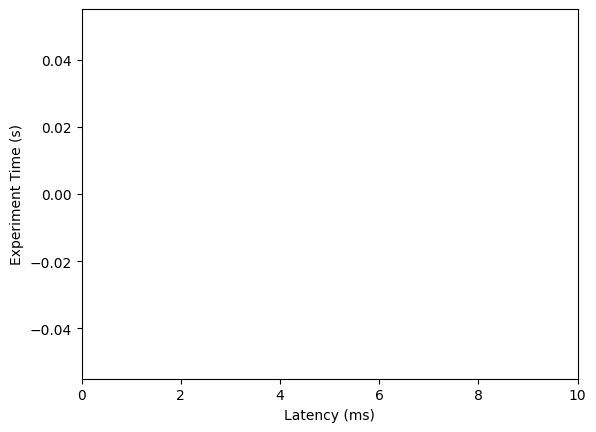

In [66]:
import numpy as np
import matplotlib.pyplot as plt

#spikes = data_reshaped

input_ids = [10608]
output_ids = [10608]

for input_id in input_ids:

    # Define your electrodes
    output_electrodes = np.array(output_ids, dtype=float)
    input_electrode = np.array([input_id], dtype=float)

    # Define your constants
    input_color = 'blue'  # input electrode spike color
    output_color = 'pink'  # output electrode spike color

    # Filter spikes for input electrodes
    input_spikes = spikes[spikes[:, 0] == input_electrode]
    print(f'Plotting latencies for input {input_electrode}')


    fig1, ax1 = plt.subplots()
    ax1.set_ylabel("Experiment Time (s)")
    ax1.set_xlim((0., 10.))
    ax1.set_xlabel("Latency (ms)")

    # Filter out the input electrode from output electrodes
    output_electrodes_filtered = output_electrodes

    c=0
    # Plotting
    for output_electrode in output_electrodes_filtered:
        # Get the latency
        latency = get_latency(spikes, input_electrode, output_electrode)

        # Separate input, input_output, and output spikes
        input_before = latency[latency['category'] == 'input']
        input_output_before = latency[latency['category'] == 'input_output']
        output_before = latency[latency['category'] == 'output']

        # Plot with different colors for each category
        
        ax1.scatter(input_output_before['latency'], input_output_before['spike time'] / 1000, s=7, label='input_output', color='pink')  # or any color you prefer
        ax1.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, label='output', color='pink')
        if c == 0:
            ax1.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, label='input', color='blue')
            c += 1

    plt.show()


In [70]:
def plot_latency_and_location_with_extremum_here(input_ids, output_ids, unit_pre, unit_post, unit_ids, spikes_extremum):
    #include_input_in_latency = True
    #gain = 6.3
    for idx, input_id in enumerate(input_ids):
        #if include_input_in_latency:
        #    output_ids = list(set(output_ids + [id for id in input_ids if id != input_id]))

        input_electrode = np.array([input_id], dtype=float)
        input_color = 'blue'
        #input_spikes = spikes[spikes[:, 0] == input_electrode]
        input_spikes = spikes_extremum['Spike_Time'][spikes_extremum['UnitIdx'] == unit_ids.index(unit_pre)]
        #output_electrodes = spikes[np.isin(spikes[:, 0], output_ids)]
        output_electrodes_filtered = np.array(output_ids)

        fig1, ax1 = plt.subplots()
        ax1.set_ylabel("Experiment Time (s)")
        ax1.set_xlim((0., 10.))
        ax1.set_xlabel("Latency (ms)")

        for output_electrode in output_electrodes_filtered:
            output_color = 'pink'
            if output_color is not None:
                latency = get_latency_with_extremum(spikes_extremum, unit_ids, unit_pre, unit_post)
                latency = latency[latency['latency'] < 10]
                
                input_before = latency[latency['category'] == 'input']
                output_before = latency[latency['category'] == 'output']
                
                #with open(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_output_el_{int(output_electrode)}_lag_{lag}.pkl"), 'wb') as f:
                #    pickle.dump(latency, f)

                
                ax1.scatter(output_before['latency'], output_before['spike time'] / 1000, s=7, label='output', color=output_color)
                ax1.scatter(input_before['latency'], input_before['spike time'] / 1000, s=7, label='input', color=input_color)
                
                target_spike_times = np.array(spikes_extremum['Spike_Time'][spikes_extremum['UnitIdx'] == unit_ids.index(unit_post)])
                latency_extremum = output_before[np.isin(output_before['spike time'], target_spike_times)]
                
                target_spike_times_input = np.array(spikes_extremum['Spike_Time'][spikes_extremum['UnitIdx'] == unit_ids.index(unit_pre)])
                latency_extremum_input = input_before[np.isin(input_before['spike time'], target_spike_times_input)]

                ax1.scatter(latency_extremum['latency'], latency_extremum['spike time'] / 1000, s=7, label='output extremum', color='pink')
                ax1.scatter(latency_extremum_input['latency'], latency_extremum_input['spike time'] / 1000, s=20, label='input extremum', color='blue')
                
                ax1.legend()

            #plt.savefig(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_unit_pre_{unit_pre}_output_el_{int(output_electrode)}_unit_post_{unit_post}_lag_{lag}_STTRP.pdf"), format='pdf')
            #plt.savefig(os.path.join(save_path, f"{filename[:-3]}_input_el_{input_id}_unit_pre_{unit_pre}_output_el_{int(output_electrode)}_unit_post_{unit_post}_lag_{lag}_STTRP.png"), format='png')
            plt.show()
            plt.close()
       

    #return
    return latency

In [71]:

pre_extremum = [21677]
post_extremum = [2977]
unit_pre = 32
unit_post = 5
spikes_extremum = pd.DataFrame(data['SPIKEMAT_EXTREMUM'])

Input 147
Output 167


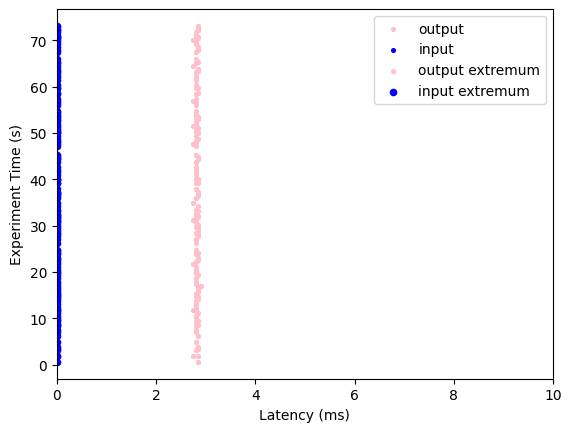

In [72]:
lat_extr = plot_latency_and_location_with_extremum_here(input_ids = pre_extremum, output_ids = post_extremum, unit_pre =  unit_pre, unit_post = unit_post, unit_ids = unit_ids, spikes_extremum = spikes_extremum)

In [ ]:
lat_extr